In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from keras import Sequential
from keras.layers import Dense
from helper import fn_plot_tf_hist, fn_plot_confusion_matrix
import time

C:\Users\duasp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
inpDir = os.path.join( '..', 'input')


modelDir = 'Neural Network'

outDir = os.path.join('output')
subDir = 'fashion_mnist'

# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results
tf.random.set_seed(RANDOM_STATE)

ALPHA = 0.001     # learning rate
EPOCHS = 30
BATCH_SIZE = 32


# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
          'savefig.dpi': 150,
          'image.cmap': 'jet',
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 2,
          'legend.numpoints' : 1
         }
CMAP = plt.cm.rainbow
plt.rcParams.update(params);
plt.set_cmap(CMAP);
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

TEST_SIZE=0.2

np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('display.precision', 2)

__all__ = ['np', 'display', 'plt', 'pd', 'sklearn', 'seaborn']

<Figure size 1500x600 with 0 Axes>

In [3]:
train_df=pd.read_csv(os.path.join(inpDir, 'fashion-mnist_train.csv'))
test_df=pd.read_csv(os.path.join(inpDir, 'fashion-mnist_test.csv'))

In [4]:
train_df

,label,pixel1,pixel2,pixel3,...,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,...,0,0,0,0
1,9,0,0,0,...,0,0,0,0
2,6,0,0,0,...,0,0,0,0
3,0,0,0,0,...,0,0,0,0
4,3,0,0,0,...,0,0,0,0
...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,...,0,0,0,0
59996,1,0,0,0,...,0,0,0,0
59997,8,0,0,0,...,0,0,0,0
59998,8,0,0,0,...,0,0,0,0


In [5]:
test_df

,label,pixel1,pixel2,pixel3,...,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,...,0,0,0,0
1,1,0,0,0,...,0,0,0,0
2,2,0,0,0,...,31,0,0,0
3,2,0,0,0,...,222,56,0,0
4,3,0,0,0,...,0,0,0,0
...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,...,1,0,0,0
9996,6,0,0,0,...,28,0,0,0
9997,8,0,0,0,...,42,0,1,0
9998,8,0,1,3,...,0,0,0,0


In [6]:
train_df.shape, test_df.shape

((60000, 785), (10000, 785))

In [7]:
class_names = {0: 't-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
              5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

In [8]:
train_df['label'].unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1], dtype=int64)

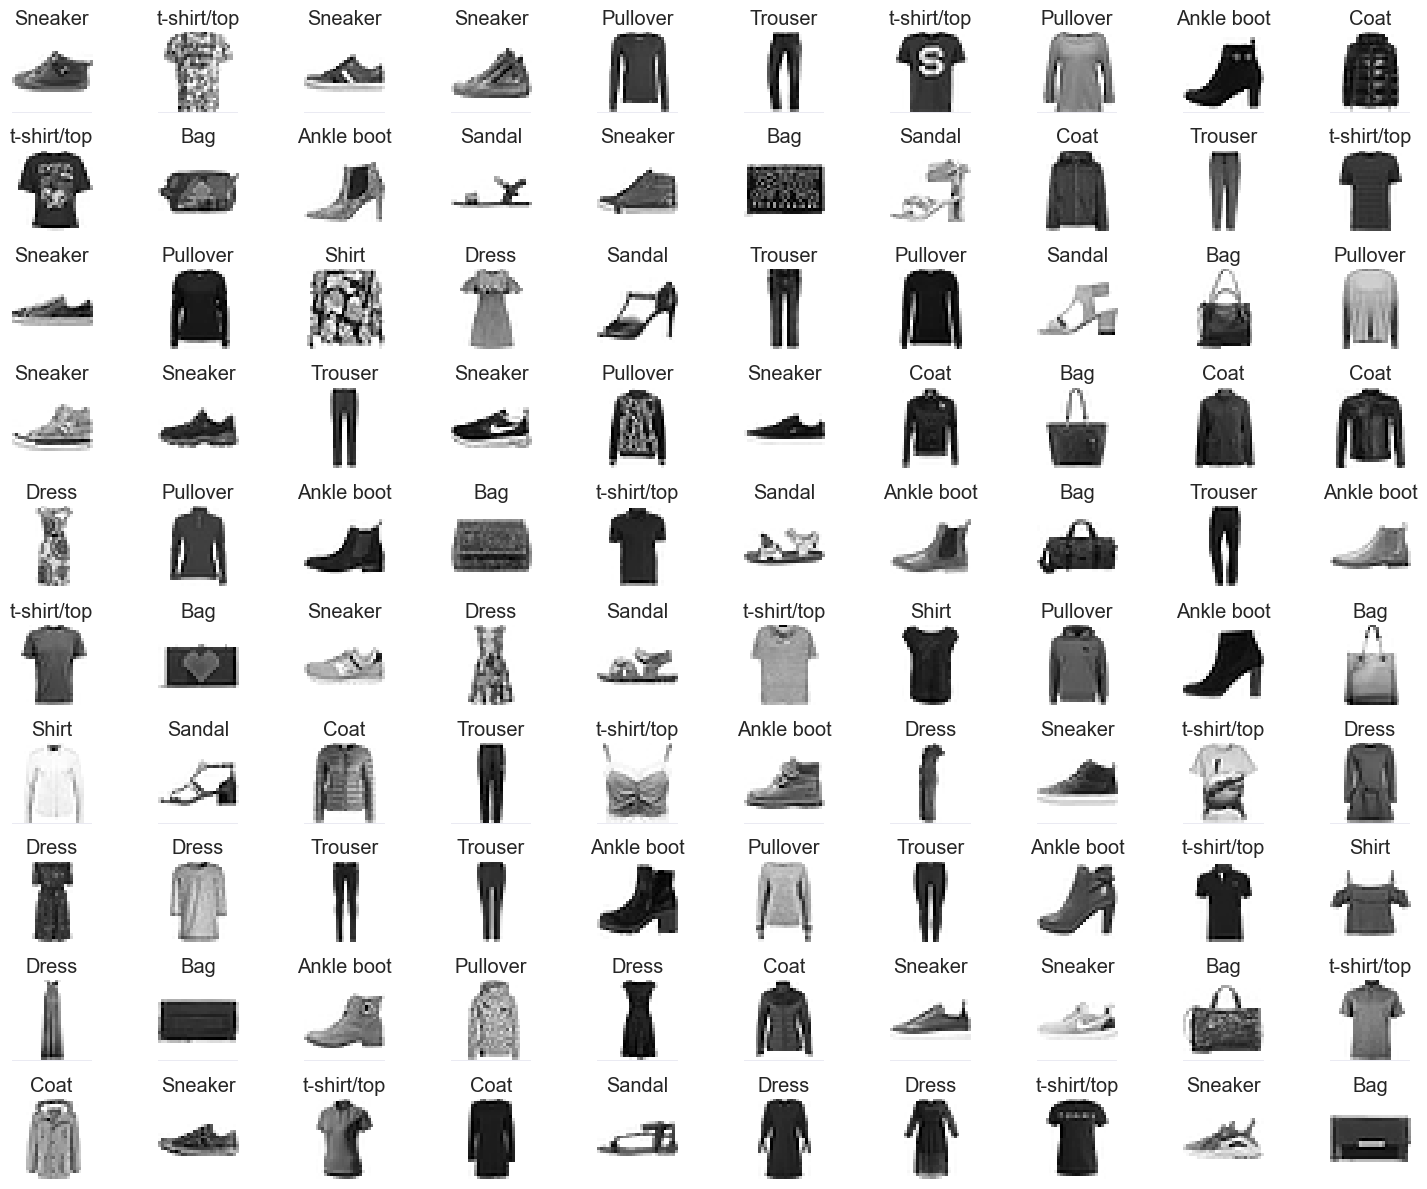

In [9]:
plot_df = train_df.sample(n = 100)

fig = plt.figure(figsize = (15,12))

i = 0

for _ , row in plot_df.iterrows():
    i += 1
    image = row.values[1:].reshape(28,28)
    ax = fig.add_subplot(10,10,(i), xticks = [], yticks = [])
    ax.imshow(image, cmap = plt.cm.binary)
    label = row.iloc[0]
    ax.set_title(class_names[label])
plt.tight_layout()

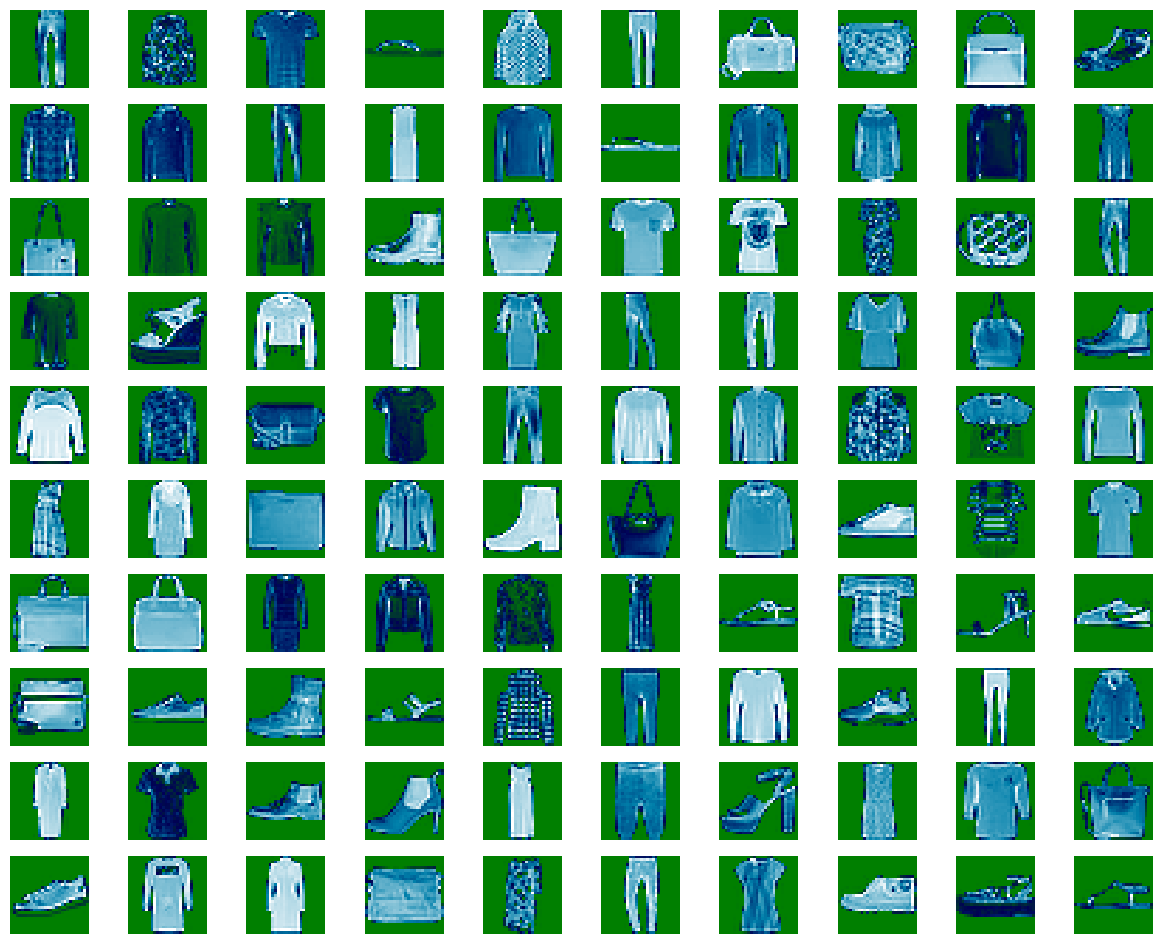

In [10]:
plot_df = train_df.sample(n = 100)

fig = plt.figure(figsize = (15,12))

i = 0

for _ , row in plot_df.iterrows():
    i += 1
    image = row.values[1:].reshape(28,28)
    ax = fig.add_subplot(10,10,(i), xticks = [], yticks = [])
    ax.imshow(image, cmap = 'ocean')

In [11]:
cols = train_df.columns
for col in cols:
    print(f'\nColumns Name: {col} : {train_df[col].unique()}')


Columns Name: label : [2 9 6 0 3 4 5 8 7 1]

Columns Name: pixel1 : [ 0 14  7  3 16  1  4  2]

Columns Name: pixel2 : [ 0  1  3 10  6  2  7  5 16 14 13  9 34 15  4 11 36]

Columns Name: pixel3 : [  0   2   1  10   3   6   4   5   7  56  34  32  16  14  78  25  13   9
   8  52  35  30  23  54 226  15 106]

Columns Name: pixel4 : [  0   1   5   2   3  20  46  87   4  16  12   6  64  36  52  13   7 164
 110  14  92 106 120 105  53  70   9  23  49  25  26  34 121  21  17  10
  41  18  28  80  56 144  22  54  55  50  90 150  19 109  83 132  48  11
  32 145  39  96  15  58   8  68  82 146  86]

Columns Name: pixel5 : [  0   2   4   1   5   3  26  14  39  62  15  16  84   7  88  41  65  17
  35  61  11  21  10   6  18 119 162 106  34  12 217  33  24  37  13 185
  38  71  73   9  40  56  68 171  89  97  91  23  59  42  77 103  29 148
 140  31  45 201   8  95 133  80  44  43  27  20  32  58 123  22 116  66
  60  53 145  85 100  54 210 166 113  19  28 227  30  51  64  96  75  70
  90  82 115 15


Columns Name: pixel46 : [  0 172 166 189   1 255  53 230 171 210  76 173 169 198 145 217 156  83
 234 220  79 241 111 197 244 141  67 137 140 129 195 168 163  47 231  59
 224 247 218 216 215  12 133  92 204  38 142  28 212  58  51 149 115 223
 226  73 124  98  39  78 100  23  63 209 135 143  14 228  99 184 146  84
 225 161 118 214   5 108 187 202  16 131 233 132  57 138 253 207 185 180
 120 121 181 190  54 134 109 213 240  37 249 102  44 151  68  35 246 116
 160  93  86  87  52 148 232 194 248 192 222  75 219 178 237 153  64 164
 117  66 105 183 127 227 130 177  42 159 162  81 196 170 158 125 182  96
 176 243  62 136 221  65 211  70 250  88  69 201  43 188 235  95 236 229
 208 157 186 113 107 174  48 150  21  25   2   3   4  27 254  29  30 104
   6 238  91  60 252  13  77 206 245  15 175  10 147  45  36 242 239 119
   7 200 128  85  94 122 191 203 103 167  18   9  33 101 165 139  56 112
 251  24  31 193  80  50  90 152 106 154 126  49  19  82 110 205  40  20
  32  71  97  17   8 199 1


Columns Name: pixel85 : [  0   1  14   4  68   6   7   3   2  16   5  13  32  22  88  44 169 100
  17 123  19  80  38  31  12  26  96  47   8  48  10 167 135  28  57 124
 146   9 129  43 189 134  81]

Columns Name: pixel86 : [  0   1   2  12 248   4  60   7  13   3  82  10  92   6  28   5  46  62
 144 163   8  43 177  86  32  41  56  49  77  80 135 229  25  24 146  16
 104 255  98  11  19  75  14 101   9 162 130  17  15 154 165 251  20  67
  93  79 235  53  34  71 166 128  61  87 246 120  29  44  66 136  35  42
 182 236 185 189 228 103 192  89  36 170  47  76  73 100  48  88 190 155
  74 139 220  83 108  21  78 132 216  30]

Columns Name: pixel87 : [  0   3   1   5   2 137 113  47   4 135   7  32  42 142  61  85  27  51
  24  20   9  87  86 128 122 110   6  30  92  76  39 177  10  16 181 102
 159 163 109  90 248 130  55   8  13  93 185  22  23 208 168  17 255  53
  52  49  45 149  35  18 172  15 115  80  60 125  91 183 236 145  73  21
 214  78 153  44  58  14  94  62  69  33  99  79  


Columns Name: pixel171 : [  1   0 184  61   2 248  10   5  63 192  26   4 154 212 102  44  32  38
 127   3  19  92  31  37 143 101 159 234 242  45 188 213 145 163 221  87
  52 126  86 179 173 241  66  51 128  95 157 115 158 107 233 167  67  99
 161   8 118 183  42 190 180  90   6  89 130 166 109  84  27 229 108  73
 137  57 224  81  15  11  80  47  56 124 110 172 160  77  46 119 114  65
 152 155 139  48  82  12 103 120 174  36  58 203 181   9 185 198 206 123
 106  40  60  98 148 150 162  74  39 117 196  24  78  71  53 146 253  41
 151   7 113 191 182 200  59 204 136  16  34 131 228  93  68  79  69 140
  94 170  18 214  13 211 147  83 193  20 100 195 189  22  33 149  54 105
 125 135 165  43  25 255 226  91  64  55  14  29 142 199 122 116 252 238
  30 178 244 207  17 254 134 245 187  85 223 230 169 208 202  62  35 171
 201  72  21  76 231 246 112 225 164  49 250 144 121 153 186 232 104 141
 235  70 197 205 176 177 215 217 209 175  97  75  23 218 222 111 168  50
  88 210 133  28 138 216 


Columns Name: pixel214 : [219 162 181 145 168  97 205   0 213 144   1 102 193  95 111 237 141 130
   4 136 164 198 203  31 233  58 138 187  26 197 210 180 222  28 185  99
 152  92  91 221 201 160 192 117 190  34 105 212  46 146   3 183 178 122
  83 207 158 255 232 167 200  84 231 104 208  76 170  87  93  89  16 163
 153 228 101 113 175 218 214  29 215 223 188  38   2 225 107 245  51 220
  27 112 100  82  10 171 199 134 191   5  19  62  59 211 108 114  74 173
  86 248 139 217  35  94  70  78  32 186 227 176 110 226 142  77 240 165
 133  88 119  57 121   6 209 109 182  22 135 172  79 166 216 156 184 230
 224 120 229  90  67  85 150 157 243 239  56 249 177 154  49 103  54  48
 115  37 140  69  61 195 143 137 238 131   8 196 128  45 126 247 169 234
 202 123  64 204 148 161  73 206 189   9 174 244 252  55  75  40  68 194
  12 159 155  17  21  33  66 179  60  13  44 241  30 246 118 127 149  80
 147 129 106 116  72 125 236 151  11 254  63  50  42  81 235 253  98  39
  65 251 242  18  41 124 


Columns Name: pixel249 : [  0 207 184  81 202 232 133  66 212 156  42 230   6 178   8 168 186   1
  38   5 248 253  24   7  51 146 255   3 104  50 154 182  82  65 234  76
 219  44  36  68  46  70  17  41 111  60 112 189  59 102 185  23  95 210
  93 191 173 120  90 243  89 103 216 161 201 199 192 132  27  29 175  53
 237  87 164 222 226 203 214 198 179  19 211  79  64  56 170 118 160  16
 101  34  83 128 213 238  85 153  26  69   2 223  43 205  92 129  39  47
 176 225 113  52  31 158  63  15 149 142 159 180 190 227 117  48 236  77
 137 229  86 241 151  74 148 252  30 218 131  12 231 124  18  58 171 116
 200 246 143 206 193  57 187  32 157 245 204 163 138  62  78 209 188  33
 125 162 197  37   4 228  25 121 196  28  72  40 247 244 127 114 221 177
  97 110 150 134 141 144 155  61 119 107 183  10 235  80  21 233   9 194
  49 147 145 123  84 105 106 130  20 181  67 165 169 220  88 224 174  94
 100 109 108 208  13  91 126 139 122 152  35 254  96 115  22 140  99 239
  11 240 215 136 172 167 


Columns Name: pixel321 : [195   0 201 205 220 124 225  64 219   3 232 133  92 193 235 149  86  19
  81 126 199 158 170 206 226 255   1 163  62 238  42 243 231 221  67 211
 119 109 228 102 229 194 168  23 111  97 217 204 230 241 172 141 161 223
 159  65 179 156  87 165 145  78 185 254 245 127   2 115 169 132 154 214
  84  59 239 181 183 207  28 224  94 234  69 166  63  24 196  51 144  25
  48 106  55  54  52 215 176 233  36 138 186 222 251 120  70 247  98  89
 242 142 146 244  41 108  74 157 137 184  83 123 125 212 198  35 218 210
 151  96 216 136 227  27 190 202 155 187 178  13 107  43 113 103  75 192
 203 164 189 208  76 173 121 100  26 200 236 140 175 160 101  17  18  50
 118 153  39  46 167 197  47  66 162 117  72  40 171 182  44 209 213  80
 130 105 191  99 252  16 131  88  32 104  33 248 129  85   6  12 116  20
 148 177  22  95 174 152  58  37  38 112   4 150  57  73 134 240  53 110
 135  31   7 188  14  68 249 147   5  30 143 139 253  93 128 122  61  79
 114  71  82  11 237  29 


Columns Name: pixel375 : [156   0 207  88 253 101 200 214 215 223 216 120 198 105 135 255 162  12
  57 123 138 181 166 230 202 191 177 238   1   4 239   2  64 219 227 194
  58 147 124 150 113 217 182 163 121 212 103 157 211  15   6 242 173 174
 189 158 152 171 160  69  26 169 180 246  89 234  68 235 195 132 161  92
 250 142  17 193 190  22 111  19 172 107  70  35 100  94  63 176  28  44
 149 151 125 102  79 109  73  66 206  76  32 139 130 129 228 204 167  24
 231 144 226 131 164  27 117 222 119 126 243  29  10 136  30  36  50 112
 229 184 133 118 224 213  87 225 155 170  43 218  52 199   5 185 192 108
  82 187  54  61 248  62   3 233 196 232 221 104  48  25  72  86 140  71
  39 143 175 210  91 114 249   9  78 203  60  42 159 178 122 197  55 205
 186 165  84 201 134  95 179 254   7  46  97 183 208 154  41 141 146 153
 236  38   8 188  51  23  33 220  53  80 110 127 240  98  49  99  11 116
 244 115  96  67  56  77  59 209  37  93  83  85 106 251 145 168 137 247
  90  20  34  74  47 148 


Columns Name: pixel409 : [220 229 171 255 213 186 210  23 208 177 215  27  83 110 111 227 224 191
  89  82 173 124 166 164  38 106 237   0 158  69 175  28 204  49 240 117
 127  96 108 122  54 200 143 228 193 190 179 226 216  98 101  52 217 230
 167 207 205 132 107 239 178  73 198 169 157  78 131  72 168 241  88 144
  42   2 219 199  10 223 201 181 231  48 246 105 209  70 152 234 222 174
  29 147 212  62 211 151 235  44 238 136  85  64  21 180 128 236 242 172
 206 176 248 113  58 141 214 250 155 196 187  91 130 109 165 145  25  76
 150 118 163 192  87 203 140 159 156  97 146 133 185 232  74 202  34   1
 194 233 161 135 170  77 149  40  37 160  80 225 138 123  53 183  93  24
 120 218  31 102  26   7 142 125 139 189 243 162 116  75  13  67 154  41
 148  20 115 197 184 114  59 103  39 100  63 221 188 195  56  22 153   5
  55  19   6  92  86  46 249 137  68  66  47  15  61   8  51 129  50  60
 182 121  11 134  71 244  57  30 126  94 253 252 251 245  84  99 104  33
   4 247  32  65  35  36 


Columns Name: pixel467 : [203 215 187  97 253 158 214 130 171 212  23  87 103  51 235 245 151   0
 135 185 163 188 195 181 184 229 161 165 164  36 173  65 250 255 230  30
 234 133 102 211 101  95 155 199 240  93 166 169   1 121 208 219 233 174
 209 168 142 221 118  61  47 146 159 192 246 191 116  68 152 179 156 108
  77 107 210 198 194 105  57 236 202 123   2  99  69  91 167  12 239 150
  58 139 225  63 129 186 115 134  46  19 104 231  78 175 207 127 114 100
   5 183 140 153 222 216 237  80 241  96 217  76 247  29  32 220  75 200
  16 218 204 154 124 227 206 137 110 252 190 249  40 193 131  56 141 138
 205 228  67 201  43 196  28 119  85 111 147 120 176  31 182  44 162 226
 224 157  54  52 125 106 189  74  27  48 128 170 232  21  38  73  37 149
 213  59  89 172  50  66  79  90  71  64 178 223   4 109  35  62  98 112
  86 148 177  15   3  94 117  42 248   7 143  55 180 160 238   8 144  88
  45  25  83  33  17  81  18  39  84  92 145 197 132 254  60 126  22 242
  70  41  72  82 113 122 


Columns Name: pixel539 : [217 160 228   0   3 186 141 202  89  38  51 205 187  12 243 203 107 123
 120 128 152 198  61  79 102 189 237 255 246 184   2  70   7 147 108 251
 241  90  41 199 208 130  77 209 224 174 211 165  19  11 239  48 112  68
  99  37 139 225 216 179 110 175  17 114 142 227 200  67  44  94 164  28
  40   1  63 151   5 135 115 226   4 133 127  60   9   6 232 136 207  65
  45 201 162 222 192 244 145  43  23 113  32  33 197 213 215 144  52 250
  92 219 111 148 240 214 206 104  91 229  34  30 245 252 122 134 161 168
 169 182 204  35  15 176 163 249  20 100 212  55 146 196  22 193 234 172
  93  86  75 118 181  49 125 254 191 106 155  87 159  31 173 126  69 156
 137  71 103 188  26  72  39  74  80 185 238  24 157 167  13 129  10  18
 195  85  96 109  50  84 235 230  29 253 218 180  36 149 248 150  83  64
 190 183 223  25 242  46 231   8 220 154 171 221 116  53 101  62 132  59
  82  57 119  88  66 177 158 194  76 233 138 210  97  98 117 124  78 105
  95 178 131 170 121 153 


Columns Name: pixel580 : [207 176 175 156   0 159 236 248 206 222  34  84 200  64 125  94 185 101
 104 180 155 163 189 198 197 166 136  58  69 220 215 232 238  32  66 119
 128 110  89 230 214  99 183  91 179   9 216 177 218 235  55 251 237 174
  22 100 226   3 151  85  67 118 144 154  37  76  11  98 122  15 129 203
 142 210 217 242 221 205  46 108  78 199   5  47  72 255 124  36  79   2
  75  19  60  14 109 169 196 158   4  24 152  38  83 147 126 106 247 138
 219  87  56  29 113 194   1 149  53  30 202  88 181 162 209 253 228   7
  74 116 223 213 148 161  70 186  49 225 208  42 184 233  81 243  71  40
  27  28 164 192 188 227 229  95  52 241 172  39  33 134  21  45  23 234
 190 245 157 212 204 117 173  44 165  63 224 107 211 102 133  65 193  97
 240  86 114  48 201 167 111  68 254 182 249 178 250  18  50  41 132  10
 244   6 112 191  12 171  25  43 139 195  59 141 160 146  96  73  13  17
 121  92 123  61  82 105 137  90 150  20 115 135  51  57 231 131 130 252
 145 187 143 140  35 153 


Columns Name: pixel619 : [  0  39 106   3 136  46 135  23 242 129 133  64  40  73  30 222 132 228
 219 201   1 202 104 108  24  94  84 149 164 224 177 196  51 128 225  38
 180  91 197   5 156 137 238 142  14 175 215 179 206  85 173  27  49 231
 155 198 113  29  41 143 111 185  66  56 176 204 194 171   2 178 209  74
 148  98 193 119 147 190 153  28 255 105  32 107 243 192  67  95 186  59
  62  50   4 158 212  63 114 214 154 138  88  15 112 165 160  16 168 227
 139 181 218  93  35 159 240 127 237 182 161 253   7 195  53 144  47 157
 109 223 183 151 110 217 140 213 145  20  34  83 174  45 117  48 131  17
  13 170 239  42 188 167  12 118  54  58  71 199 211 200 205 150 123  19
  76  57 221 126 203 233  79  80  55 103   9   8  26  72 184  37   6 187
 100 189  44  77  33 220  99 216  18 244 207 208 232 226  78  60  22  86
 251  68 124  10  43  31 125 115 141  25  52  96  90 120 210  89  82 169
  92  36 162 230  65  61  11 146 241 102  70 130 247 166 191 122 134  69
 245  81 116  87 254 163 


Columns Name: pixel706 : [  0 237   3 214 219   1  81  69 222  95  26  92 102 202 215 163 247 255
 145   2 162 169 240 210 206 157 125 192 197 212 195 216 144  87 135 188
  49  14 112 179 149 242  78  21  79  80 141  39 241  75  13  19 115  90
 156 189 200 207 151 133  52 103  12 153 190 155 174  32 154 226  43 177
 217 230 142 252 203  18 238 131  58 160 172  94 146   6 116 165 220  27
 178 185  34 196 198 182 168 167 227   4  56 170  47 249 138 183 243  48
 181 171  66 236 218   8 161 136  31 208 119  38   5  85 100 126 213 225
 128 244  10 140  89  62  22 199 124 209 254   9  73 246 229  97 173  25
 228 211  53 205 223  67  74 233 221 235  98 251 191  28 158 123 110  46
  68  93 147  41 186 224 232  59 245 204  83 248 114 117 184 118 180  17
 201 194  64 152  44 187   7  99 107 159  11  60  50 253  29  51 239  30
  57 250 106 120  96  33 139  55 134  61  88 122 176  15  63 148 113 101
  91  16  37 105 129 150 130 164 166  77  70 111 193  24  72  71  54 234
 109  42 132 231 104 137 


Columns Name: pixel749 : [  0 202 255 212  85 181 146  17 207 133   5 193 192  34 249 157 123  28
  30  72 213  40 211 244 254 158 119  14 140 159 137  15 220 170 165 124
 208  16 175 101   3 100 215   1 214 127  37 164  52   4   7 174 198  79
 182  25  38 138  12  96  73  66 206  41  33  43  69 188 231  95 166  45
 110   2 222 132  58  10  80 172 189 205 108 104  71 186 126 118  26 180
  57   8  29 227  48 194 237 184 144 217 128 151 150 156 223 225 236 107
  86  50 245 145 234 242 111  75 167 235 153 218 187  51 160  65 129 196
 230 121 154 109  20  55 228 103   6 102 233 152  59  74  53  63 197 131
  27  18 216  76  97  93  68 105 199 136  23 247  99  32 251  91 210  61
 169  62 240 239 117  94  56 149 252  67 200  46  31  24 130 135 134  36
 226 221  35 176 178   9 115 142 179 253 125 171  54  87 201 143 155 195
  13  77 224  11 243 114  88  92 250 147  64  22 163 162 246 185  89  19
  39 177 113 120  60 209  21  82 238 112 148  83  98 219 191 232 190 141
 248 173 204  49 106  44 


Columns Name: pixel784 : [  0  30   1  12   2   7   5   4   3  73  74  15 170  97  81  54  48  22
  14  79  24  21  17  28   6  92  45  11  40  52  38  26  27   8  16  19
  10  13  37  42  60  75  20  56  76  39   9  33  34  18  85  53  66 142
 163  49  31 155 122  43  63  58  25  36  93]


In [12]:
X_train = train_df.drop('label', axis = 1).to_numpy()
y_train = train_df['label'].to_numpy()

In [13]:
X_test = test_df.drop('label', axis = 1).to_numpy()
y_test = test_df['label'].to_numpy()

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [15]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### For Regularization

In [16]:
'''l2_reg = tf.keras.regularizers.L2(0.05)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(397, activation = 'relu', kernel_regularizer = l2_reg),
    tf.keras.layers.Dense(196, activation = 'relu', kernel_regularizer = l2_reg),
    tf.keras.layers.Dense(49, activation = 'relu', kernel_regularizer = l2_reg),
    tf.keras.layers.Dense(10)       # no activation here
])'''

"l2_reg = tf.keras.regularizers.L2(0.05)\n\nmodel = tf.keras.models.Sequential([\n    tf.keras.layers.Dense(397, activation = 'relu', kernel_regularizer = l2_reg),\n    tf.keras.layers.Dense(196, activation = 'relu', kernel_regularizer = l2_reg),\n    tf.keras.layers.Dense(49, activation = 'relu', kernel_regularizer = l2_reg),\n    tf.keras.layers.Dense(10)       # no activation here\n])"

### For Dropout

In [17]:
'''dor1 = 0.2
dor2 = 0.3
dor3 = 0.4

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(397, activation = 'relu'),
    tf.keras.layers.Dropout(dor1, seed = RANDOM_STATE),
    
    tf.keras.layers.Dense(196, activation = 'relu'),
    tf.keras.layers.Dropout(dor2, seed = RANDOM_STATE),
    
    tf.keras.layers.Dense(49, activation = 'relu'), 
    tf.keras.layers.Dropout(dor3, seed = RANDOM_STATE),
    
    tf.keras.layers.Dense(10)       # no activation here
])'''

"dor1 = 0.2\ndor2 = 0.3\ndor3 = 0.4\n\nmodel = tf.keras.models.Sequential([\n    tf.keras.layers.Dense(397, activation = 'relu'),\n    tf.keras.layers.Dropout(dor1, seed = RANDOM_STATE),\n    \n    tf.keras.layers.Dense(196, activation = 'relu'),\n    tf.keras.layers.Dropout(dor2, seed = RANDOM_STATE),\n    \n    tf.keras.layers.Dense(49, activation = 'relu'), \n    tf.keras.layers.Dropout(dor3, seed = RANDOM_STATE),\n    \n    tf.keras.layers.Dense(10)       # no activation here\n])"

In [18]:
'''model = tf.keras.Sequential([
    tf.keras.layers.Dense(397, activation = tf.keras.activations.relu),
    
    tf.keras.layers.Dense(196, activation = tf.keras.activations.relu),

    tf.keras.layers.Dense(49, activation = tf.keras.activations.relu), 

    tf.keras.layers.Dense(10)       # no activation here
])'''

'model = tf.keras.Sequential([\n    tf.keras.layers.Dense(397, activation = tf.keras.activations.relu),\n    \n    tf.keras.layers.Dense(196, activation = tf.keras.activations.relu),\n\n    tf.keras.layers.Dense(49, activation = tf.keras.activations.relu), \n\n    tf.keras.layers.Dense(10)       # no activation here\n])'

### Batch Normalization - BatchNorm

In [19]:
'''model = tf.keras.Sequential([
    tf.keras.layers.Dense(397),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    
    tf.keras.layers.Dense(196),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),

    tf.keras.layers.Dense(49),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),

    tf.keras.layers.Dense(10)       # no activation here
])'''

'model = tf.keras.Sequential([\n    tf.keras.layers.Dense(397),\n    tf.keras.layers.BatchNormalization(),\n    tf.keras.layers.ReLU(),\n    \n    tf.keras.layers.Dense(196),\n    tf.keras.layers.BatchNormalization(),\n    tf.keras.layers.ReLU(),\n\n    tf.keras.layers.Dense(49),\n    tf.keras.layers.BatchNormalization(),\n    tf.keras.layers.ReLU(),\n\n    tf.keras.layers.Dense(10)       # no activation here\n])'

### All in one

In [20]:
regularization = tf.keras.regularizers.L2(0.001)

# Dropout
dor1 = 0.2
dor2 = 0.3
dor3 = 0.4

model = tf.keras.Sequential([
    tf.keras.layers.Dense(397, kernel_regularizer = regularization),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dropout(dor1),
    
    tf.keras.layers.Dense(196,kernel_regularizer = regularization),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dropout(dor2),

    tf.keras.layers.Dense(49,kernel_regularizer = regularization),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dropout(dor3),

    tf.keras.layers.Dense(10)       # no activation here
])

In [21]:
checkpoint_path = os.path.join(modelDir, subDir, 'all_in.weights.h5')

PATIENCE = 20
LR_FACTOR = 0.1
LR_PATIENCE = 10
EPOCHS = 1000

checkpt_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor = 'val_loss',
                                                      verbose = 1,
                                                      save_weights_only = True,
                                                      save_best_only = True)

es_callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = PATIENCE,
                                               verbose = 1,
                                               restore_best_weights = True)

lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'vall_loss',
                                                   factor = LR_FACTOR,
                                                   patience = LR_PATIENCE,
                                                   verbose = 1)

In [22]:
X_train[:1].shape

(1, 784)

In [23]:
prediction = model(X_train[:1]).numpy()
prediction.sum()

-0.13385506

In [24]:
tf.nn.softmax(prediction).numpy().sum()

1.0

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (1, 397)                    │         311,645 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (1, 397)                    │           1,588 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (1, 397)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (1, 397)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (1, 196)                    │          78,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (1, 196)                    │             784 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (1, 196)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (1, 196)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (1, 49)                     │           9,653 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (1, 49)                     │             196 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (1, 49)                     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (1, 49)                     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (1, 10)                     │             500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 402,374 (1.53 MB)

 Trainable params: 401,090 (1.53 MB)

 Non-trainable params: 1,284 (5.02 KB)

In [26]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

In [27]:
y_train[:1]

array([2], dtype=int64)

In [28]:
loss_fn(y_train[:1], prediction).numpy()

2.0565016

In [29]:
optimizer = tf.keras.optimizers.Adam(learning_rate = ALPHA)
model.compile(optimizer = optimizer, loss = loss_fn, metrics = ['accuracy'])

In [30]:
history = model.fit(x = X_train, y = y_train,
                    callbacks = [checkpt_callback, lr_callback, es_callback],
                    validation_data = (X_test, y_test),
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS,
                    verbose = 1)

Epoch 1/1000
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7181 - loss: 1.4895
Epoch 1: val_loss improved from inf to 0.76480, saving model to Neural Network\fashion_mnist\all_in.weights.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - accuracy: 0.7183 - loss: 1.4883 - val_accuracy: 0.8101 - val_loss: 0.7648 - learning_rate: 0.0010
Epoch 2/1000


C:\Users\duasp\AppData\Roaming\Python\Python311\site-packages\keras\src\callbacks\callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `vall_loss` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8078 - loss: 0.8043
Epoch 2: val_loss improved from 0.76480 to 0.65039, saving model to Neural Network\fashion_mnist\all_in.weights.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.8078 - loss: 0.8042 - val_accuracy: 0.8386 - val_loss: 0.6504 - learning_rate: 0.0010
Epoch 3/1000
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8124 - loss: 0.7459
Epoch 3: val_loss did not improve from 0.65039
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8124 - loss: 0.7459 - val_accuracy: 0.8143 - val_loss: 0.7071 - learning_rate: 0.0010
Epoch 4/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8168 - loss: 0.7274
Epoch 4: val_loss did not improve from 0.65039
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8168 - loss: 0.7274 - val_accuracy: 0.8303 - val_loss: 0.6555 - learning_rate: 0.0010
Epoch 5/1000
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8214 - loss: 0.7103
Epoch

Epoch 47/1000
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8376 - loss: 0.6091
Epoch 47: val_loss did not improve from 0.50381
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8375 - loss: 0.6091 - val_accuracy: 0.8565 - val_loss: 0.5252 - learning_rate: 0.0010
Epoch 48/1000
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8358 - loss: 0.6149
Epoch 48: val_loss did not improve from 0.50381
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8358 - loss: 0.6149 - val_accuracy: 0.8588 - val_loss: 0.5189 - learning_rate: 0.0010
Epoch 49/1000
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8364 - loss: 0.6141
Epoch 49: val_loss did not improve from 0.50381
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8364 - loss: 0.6141 - val_accuracy: 0.8329 - val_loss: 0.6087 - learning_rate: 0.0010
Epoch 50/1000
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8377 - loss: 0.6108
Epoch 50: val_loss did not improve from 0.50381
1875/18

In [31]:
model.evaluate(X_test, y_test, verbose = 2)

313/313 - 1s - 4ms/step - accuracy: 0.8656 - loss: 0.5038


[0.5038113594055176, 0.8655999898910522]

In [32]:
loss_df = pd.DataFrame(history.history)
loss_df.head()

,accuracy,loss,val_accuracy,val_loss,learning_rate
0,0.77,1.15,0.81,0.76,1.00e-03
1,0.81,0.78,0.84,0.65,1.00e-03
2,0.81,0.74,0.81,0.71,1.00e-03
3,0.82,0.72,0.83,0.66,1.00e-03
4,0.82,0.71,0.82,0.64,1.00e-03


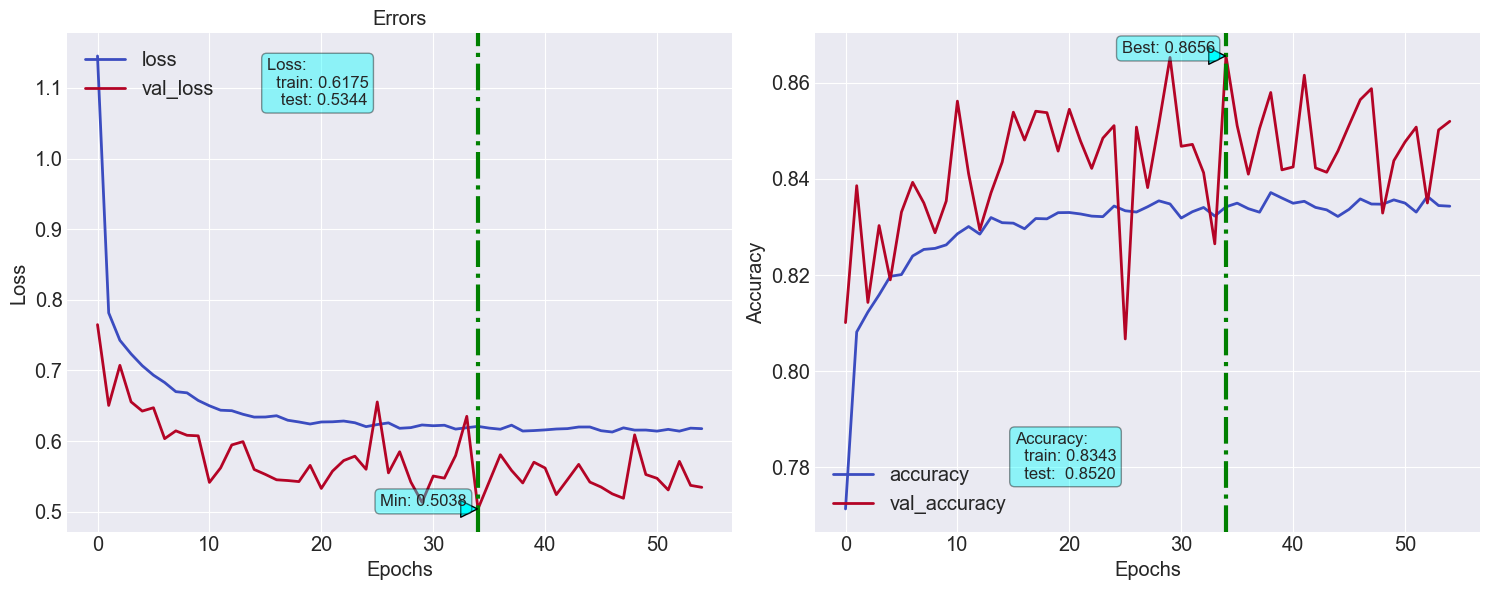

In [33]:
fn_plot_tf_hist(loss_df)

In [45]:
#model.load_weights(checkpoint_path)
#model.evaluate()

In [35]:
y_logits = model(X_train)
y_pred1 = tf.nn.softmax(y_logits).numpy()

In [36]:
y_pred1

array([[0.168, 0.001, 0.139, ..., 0.   , 0.061, 0.   ],
       [0.   , 0.   , 0.   , ..., 0.505, 0.001, 0.485],
       [0.006, 0.   , 0.071, ..., 0.   , 0.004, 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 1.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 1.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.902, 0.   , 0.003]], dtype=float32)

In [37]:
pred_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [38]:
y_pred = pred_model(X_train).numpy()
y_pred

array([[0.168, 0.001, 0.139, ..., 0.   , 0.061, 0.   ],
       [0.   , 0.   , 0.   , ..., 0.505, 0.001, 0.485],
       [0.006, 0.   , 0.071, ..., 0.   , 0.004, 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 1.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 1.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.902, 0.   , 0.003]], dtype=float32)

In [39]:
print(classification_report(y_train, y_pred.argmax(axis = 1)))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      6000
           1       1.00      0.95      0.97      6000
           2       0.82      0.74      0.78      6000
           3       0.87      0.90      0.89      6000
           4       0.75      0.85      0.79      6000
           5       0.95      0.97      0.96      6000
           6       0.70      0.64      0.67      6000
           7       0.95      0.93      0.94      6000
           8       0.95      0.97      0.96      6000
           9       0.95      0.96      0.95      6000

    accuracy                           0.88     60000
   macro avg       0.88      0.88      0.88     60000
weighted avg       0.88      0.88      0.88     60000



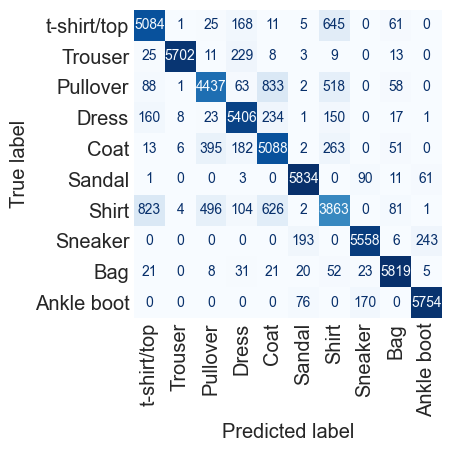

In [40]:
fn_plot_confusion_matrix(y_train,y_pred.argmax(axis = 1), class_names)

In [41]:
y_pred = pred_model(X_test).numpy()
y_pred

array([[0.652, 0.   , 0.001, ..., 0.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.057, 0.001, 0.565, ..., 0.   , 0.013, 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 1.   , 0.   ],
       [0.041, 0.   , 0.02 , ..., 0.   , 0.855, 0.   ],
       [0.104, 0.021, 0.656, ..., 0.   , 0.012, 0.   ]], dtype=float32)

In [42]:
print(classification_report(y_test, y_pred.argmax(axis = 1)))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1000
           1       0.99      0.96      0.98      1000
           2       0.82      0.70      0.76      1000
           3       0.88      0.91      0.90      1000
           4       0.75      0.86      0.80      1000
           5       0.94      0.94      0.94      1000
           6       0.68      0.63      0.65      1000
           7       0.93      0.91      0.92      1000
           8       0.94      0.97      0.95      1000
           9       0.92      0.95      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.86     10000
weighted avg       0.87      0.87      0.86     10000



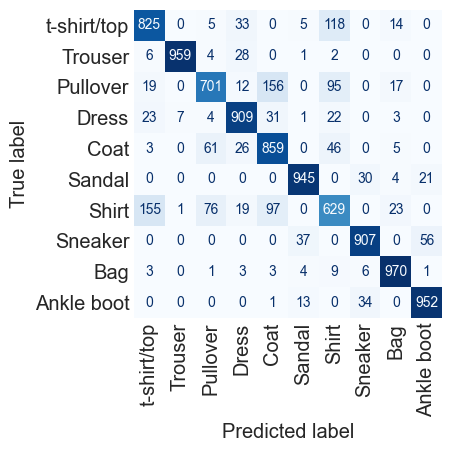

In [43]:
fn_plot_confusion_matrix(y_test,y_pred.argmax(axis = 1), class_names)

In [50]:
'''test_df['pred'] = y_pred
plot_df = train_df.sample(n = 100)

fig = plt.figure(figsize = (15,12))

i = 0

for _ , row in plot_df.iterrows():
    i += 1
    image = row.values[1:].reshape(28,28)
    ax = fig.add_subplot(10,10,(i), xticks = [], yticks = [])
    ax.imshow(image, cmap = plt.cm.binary, interpolation = 'nearest')
    ax.text(2,4,str(row.iloc[0]), color = 'b')
    color = 'g'
    if row.iloc[0] != row.iloc[785]:
        color = 'r'
    ax.text(2,25, class_names[row.iloc[0]], color = color)
plt.tight_layout()
plt.show()
'''

"test_df['pred'] = y_pred\nplot_df = train_df.sample(n = 100)\n\nfig = plt.figure(figsize = (15,12))\n\ni = 0\n\nfor _ , row in plot_df.iterrows():\n    i += 1\n    image = row.values[1:].reshape(28,28)\n    ax = fig.add_subplot(10,10,(i), xticks = [], yticks = [])\n    ax.imshow(image, cmap = plt.cm.binary, interpolation = 'nearest')\n    ax.text(2,4,str(row.iloc[0]), color = 'b')\n    color = 'g'\n    if row.iloc[0] != row.iloc[785]:\n        color = 'r'\n    ax.text(2,25, class_names[row.iloc[0]], color = color)\nplt.tight_layout()\nplt.show()\n"